In [76]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt

In [83]:
df = pd.read_csv("heart.csv")

# df.head()

# Introduce missing values

In [84]:
def bootstrap(l, n):
    
    res = []
    for i in range(n):
        res.append(random.choice(l))
        
    return(res)

In [85]:
na_row_indices = np.random.randint(0,302, size = 64)
na_col_indices = np.random.randint(3,13, size = 64)

for x,y in zip(na_row_indices, na_col_indices):
        df.iloc[x,y] = None

In [86]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     7
chol         1
fbs          8
restecg     12
thalach      4
exang        7
oldpeak      7
slope        9
ca           5
thal         4
target       0
dtype: int64

# Introduce outliers

In [87]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,296.000000,302.000000,295.000000,291.000000,299.000000,296.000000,296.000000,294.000000,298.000000,299.000000,303.000000
mean,54.366337,0.683168,0.966997,131.385135,246.456954,0.152542,0.536082,149.327759,0.331081,1.035473,1.397959,0.728188,2.311037,0.544554
std,9.082101,0.466011,1.032052,17.239106,51.807686,0.360157,0.526443,22.783477,0.471399,1.161381,0.613941,1.026555,0.613258,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [88]:
na_row_indices = np.random.randint(0,302, size = 2)
trestbps_outliers = np.random.randint(240,290, size = 2)
df.loc[na_row_indices, "trestbps"] = trestbps_outliers

na_row_indices = np.random.randint(0,302, size = 3)
chol_outliers = np.random.randint(600,700, size = 3)
df.loc[na_row_indices, "chol"] = chol_outliers

na_row_indices = np.random.randint(0,302, size = 3)
thalach_outliers = np.random.randint(230,270, size = 3)
df.loc[na_row_indices, "thalach"] = thalach_outliers

In [89]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,296.000000,302.000000,295.000000,291.000000,299.000000,296.000000,296.000000,294.000000,298.000000,299.000000,303.000000
mean,54.366337,0.683168,0.966997,132.459459,250.430464,0.152542,0.536082,150.193980,0.331081,1.035473,1.397959,0.728188,2.311037,0.544554
std,9.082101,0.466011,1.032052,21.088636,65.295140,0.360157,0.526443,25.055425,0.471399,1.161381,0.613941,1.026555,0.613258,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,241.500000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,286.000000,689.000000,1.000000,2.000000,264.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


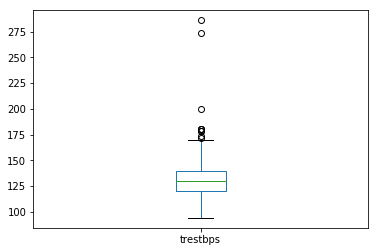

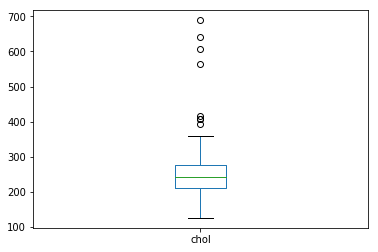

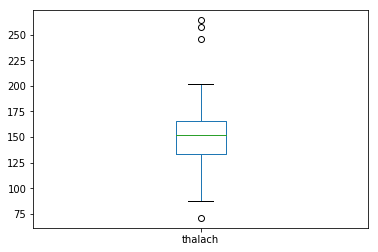

In [90]:
for col in ["trestbps", "chol", "thalach"]:
    df[col].plot.box()
    plt.show()

In [91]:
df.to_csv("heart_mod.csv", index=False)